In [111]:
%matplotlib inline
import numpy as np
import math
from math import pi, factorial as fac, pow, log10 as ln
from matplotlib import pyplot as plt

In [112]:
size = 100
xs = np.linspace(-pi, pi, size)
errTerms = lambda x, factor: (pow(x,factor)/fac(factor))

### Homework 1

Try to do it by hands first(at least for the first term) then check with/ use wolframalpha.

Find 3-rd derivative: just type ` d^3/dx^3 tan(x)` or `d^3/dx^3 tan(x) at x =10`

If you need to taylor series, just type `taylor cos(x) at x = 0`.



1) Plot $\cos(x)$ from $-\pi$ to $\pi$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same graph.

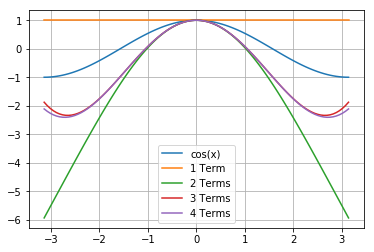

In [103]:
cos = np.cos(xs)
twoTerms = np.subtract(cos, [errTerms(x, 2) for x in xs])
threeTerms = np.add(twoTerms, [errTerms(x, 4) for x in xs])
fourTerms = np.subtract(threeTerms, [errTerms(x, 8) for x in xs])

plt.plot(xs, cos, label="cos(x)")
plt.plot(xs, [1]*size, label="1 Term")
plt.plot(xs, twoTerms, label="2 Terms")
plt.plot(xs, threeTerms, label="3 Terms")
plt.plot(xs, fourTerms, label="4 Terms")

plt.legend()
plt.grid()

1.1) If we estimate $\cos(0.1)$ using 4 **non-zero** terms, what is the bound on the **truncation error**.

In [97]:
x = 0.1
accuracy = lambda y, z: (y)/math.factorial(z)
taylorfx = lambda x, y: x + accuracy(y, 2) * x**2
print(taylorfx(x, math.cos(-1)))
print(taylorfx(x, math.cos(1)))

0.1027015115293407
0.1027015115293407


1.2) How many **non-zero** terms do we need to calculate $\cos(0.1)$ such that the bound on the **truncation error** is less than $10^{-7}$

In [108]:
error_for_n_terms = lambda n, x: x**n/fac(n+1)

for i in range(30):
    print (error_for_n_terms(i, 0.5))
    if (error_for_n_terms(i, 0.1) < 1e-7):
        print("a: ", i)
        break

1.0
0.25
0.041666666666666664
0.005208333333333333
0.0005208333333333333
4.340277777777778e-05
a:  5


2) Plot $\ln (1+x)$ from $-0.5$ to $0.5$ along with the Taylor approximation using (1,2,3,4) terms. I want 5 lines on the same plot.

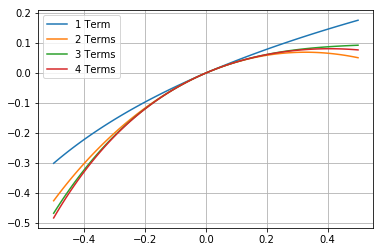

In [119]:
lnspace = np.linspace(-0.5, 0.5, size)
nTerm = lambda x, factor: pow(x, factor)/factor

firstTerm = [ln(1 + n) for n in lnspace]
secondTerm = np.subtract(firstTerm, [nTerm(n, 2) for n in lnspace])
thirdTerm = np.add(secondTerm, [nTerm(n, 3) for n in lnspace])
forthTerm = np.subtract(thirdTerm, [nTerm(n, 4) for n in lnspace])

plt.plot(lnspace, firstTerm, label="1 Term")
plt.plot(lnspace, secondTerm, label="2 Terms")
plt.plot(lnspace, thirdTerm, label="3 Terms")
plt.plot(lnspace, forthTerm, label="4 Terms")

plt.legend()
plt.grid()

2.1)If we calculate $\ln(1.5)$ using 3 **non-zero** terms, what is the bound on the **truncation error**.

2.2)How many **non-zero** terms do we need to calculate $\ln(1.5)$ such that the bound on **truncation error** is less than $10^{-7}$. Be sure to justify the maximum of $f^{(n+1)}(\xi)$ term.

3) Notice that $\tan(1) = \pi/4$ , this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

3.1) Find taylor expansion of $\arctan$ for 3 **non-zero** terms. If you forgot,
$$
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
$$

3.2) Guess the rest of the terms

3.3) Calculate $\pi$ using taylor approximation for 100 **non-zero** terms. (Note I changed this to 100 terms so you must write some sort of for loop to do it).

4) The purpose of this problem is to make sure you know that the bound on $f^{(n+1)}(\xi)$ after all the cancellation is **NOT** necessarily 1 **NOR** does it have to look the same as the next term in the series.

4.1)Find the first 3 **non-zero** terms of Taylor series for
$$f(x) = \frac{1}{1-x}$$

4.2) If we estimate $$\frac{1}{0.8} = \frac{1}{1-0.2}$$ using the first 3 non-zero terms, what is the bound on the truncation error. Be careful about evaluating the bound for $f^{(n+1)}({\xi})$.

5) (Optional) When Taylor series sort of doesn't work. 
$$
f(x) = \begin{cases}
e^{-1/x^2} & x \ne 0 \\
0 & x = 0
\end{cases}
$$

Find taylor series expansion of this function around $x=0$ for 5 terms. Take the limit carefully.

Did you notice something? What's happening? (Plot and Try to calculate the error term to see what is going on)